### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import import_ipynb
import matplotlib.pyplot as plt

importing Jupyter notebook from kmeans.ipynb
importing Jupyter notebook from kmeanspp.ipynb
[array([8, 8]), array([-2, -2]), array([2, 2])]
[[ 0.8  1.   1. ]
 [ 0.8 -1.   2. ]
 [-1.   1.2  3. ]
 [ 1.  -1.2  2. ]
 [-0.8 -1.   0. ]
 [ 1.   0.8  1. ]
 [-1.  -1.2  0. ]
 [ 1.   1.2  1. ]
 [ 1.  -0.8  2. ]
 [ 1.   1.   1. ]
 [ 1.  -1.   2. ]
 [-1.   0.8  3. ]
 [-1.  -0.8  0. ]
 [-1.  -1.   0. ]
 [-0.8  1.   3. ]
 [-1.   1.   3. ]]
[array([-0.95, -1.  ]), array([0.95, 1.  ]), array([ 0.95, -1.  ]), array([-0.95,  1.  ])]


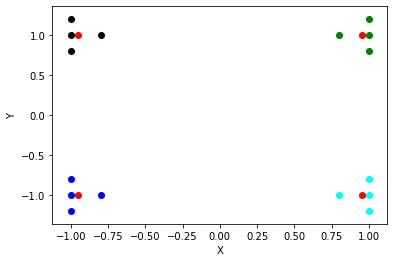

In [2]:
from kmeans import kmeans
from kmeanspp import compute_distance

## K-Means Testing

### Calculate Inertia

In [3]:
# Input
# centers: array containing all centroids
# clustered_data: all data points along with it's cluster
# Output
# Inertia
def calculate_inertia(centers, clustered_data):
    inertia = 0
    num_rows = clustered_data.shape[0]
    for i in range(num_rows):
        cluster_index = int(clustered_data[i][-1])
        center = centers[cluster_index]
        point = clustered_data[i][:-1]
        inertia += compute_distance(point, center)
    return inertia


### Calculate Dunn Index

In [4]:
# Input
# centers: array containing all centroids
# clustered_data: all data points along with it's cluster
# Output
# Dunn Index
def calculate_dunn_index(centers):
    if len(centers) < 2:
        return 1
    dist = []
    num_centers = len(centers)
    for i in range(num_centers):
        for j in range(i+1, num_centers):
            dist.append(compute_distance(centers[i], centers[j]))
    min_dist = dist[0]
    max_dist = dist[0]
    for i in range(1, len(dist)):
        min_dist = min(min_dist, dist[i])
        max_dist = max(max_dist, dist[i])
    return min_dist / max_dist

### Plot Inertia and Dunn Index vs K

In [5]:
def plotGraphs(data, maxK = 10):
    inertias = []
    dunn_indices = []
    Ks = range(1, maxK + 1)
    for i in range(1, maxK + 1):
        clustered_data, centers = kmeans(i, data)
        inertia = calculate_inertia(centers, clustered_data)
        dunn_index = calculate_dunn_index(centers)
        inertias.append(inertia)
        dunn_indices.append(dunn_index)
        print(inertia)
        print(dunn_index)
    plt.plot(Ks, inertias)
    plt.xlabel("K")
    plt.ylabel("Inertia")
    plt.show()
    plt.plot(Ks, dunn_indices)
    plt.xlabel("K")
    plt.ylabel("Dunn Index")
    plt.show()

In [6]:
df_products = pd.read_csv("df_products.csv",encoding="latin1")
df_products


,Unnamed: 0,StockCode,Description,root-1,root-2,root-3,root-4,root-5,root-6,root-7,...,root-371,root-372,root-373,root-374,priceRange-1,priceRange-2,priceRange-3,priceRange-4,priceRange-5,priceRange-6
0,0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,71053,WHITE METAL LANTERN,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2,84406B,CREAM CUPID HEARTS COAT HANGER,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,1,0,0
3,3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,4,84029E,RED WOOLLY HOTTIE WHITE HEART.,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3891,3891,90214W,"LETTER ""W"" BLING KEY RING",0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3892,3892,90214Z,"LETTER ""Z"" BLING KEY RING",0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3893,3893,90089,PINK CRYSTAL SKULL PHONE CHARM,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3894,3894,85123A,CREAM HANGING HEART T-LIGHT HOLDER,1,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [13]:
df_products_inp = df_products.drop(["StockCode","Description",df_products.columns[0]],axis=1)
df_products_inp

,root-1,root-2,root-3,root-4,root-5,root-6,root-7,root-8,root-9,root-10,...,root-371,root-372,root-373,root-374,priceRange-1,priceRange-2,priceRange-3,priceRange-4,priceRange-5,priceRange-6
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3891,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3892,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3893,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3894,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [14]:
df_products_np = df_products_inp.to_numpy()
print(df_products_np.shape)

(3896, 380)


11367.679414784343
1
10715.101822661725
1.0
10614.185884568094
0.4368203252199963
10206.726667125957
0.2935996758298234
9199.23858811406
0.7357233597768306
9492.176960627497
0.14962679143853475
9512.241294449246
0.1320713394047832
8129.08424748628
0.2697147254565862
8301.574864142263
0.17643256735501492
8287.3002402844
0.1419247785110785


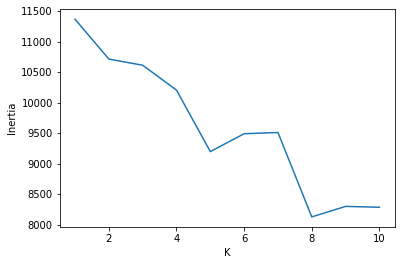

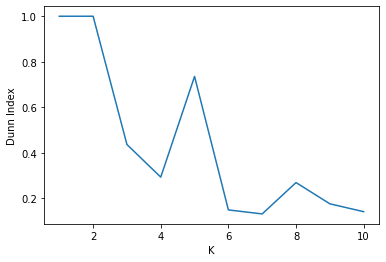

In [16]:
plotGraphs(df_products_np,10)

Optimal number of product categories = 5